## 전복 나이 예측 경진대회
전복 데이터를 기반으로 전복의 나이를 예측해주세요!

### 1. train.csv : 학습 데이터
- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이


### 2. test.csv : 테스트 데이터
- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게


### 3. sample_submissoin.csv : 제출 양식
- id : 샘플 아이디
- Target : 전복 나이

### `1.` 라이브러리 임포트

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb                                 # gradient boosting 방식의 알고리즘입니다.
from xgboost import XGBRegressor                       # 여러 개의 결정 트리를 임의적으로 학습하는 앙상블의 부스팅 유형 알고리즘입니다.
from sklearn.model_selection import KFold              # 사이킷런 패키지에서 제공하는 교차 검증을 위해 validation 세트를 나눠주는 함수입니다. 분류라면 StratifiedKFld를 사용하는것이 좋습니다.
from sklearn.preprocessing import LabelEncoder         # 문자 데이터를 정수형 데이터로 변환해주는 함수입니다.
from sklearn.model_selection import GridSearchCV       # 최적의 파라미터를 찾기 위한 함수입니다.
from sklearn.ensemble import GradientBoostingRegressor # 부스팅 유형 알고리즘입니다.
from google.colab import drive
drive.mount('/content/gdrivd/')

### `2.` 데이터 로드

In [ ]:
# train_data
train_data = pd.read_csv('/content/gdrivd/MyDrive/Dacon/abalone age prediction contest/data/train.csv')

# test_data
test_data = pd.read_csv('/content/gdrivd/MyDrive/Dacon/abalone age prediction contest/data/test.csv')

# submisiion_data
submission_data = pd.read_csv('/content/gdrivd/MyDrive/Dacon/abalone age prediction contest/data/sample_submission.csv')

### `3.` 데이터 정보 확인

In [ ]:
display(train_data.head())
print(train_data.info())
display(test_data.head())
print(test_data.info())
display(submission_data.head())
print(submission_data.info())

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB
None


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2924 non-null   int64  
 1   Gender          2924 non-null   object 
 2   Lenght          2924 non-null   float64
 3   Diameter        2924 non-null   float64
 4   Height          2924 non-null   float64
 5   Whole Weight    2924 non-null   float64
 6   Shucked Weight  2924 non-null   float64
 7   Viscra Weight   2924 non-null   float64
 8   Shell Weight    2924 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.7+ KB
None


,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      2924 non-null   int64
 1   Target  2924 non-null   int64
dtypes: int64(2)
memory usage: 45.8 KB
None


### `4-1.` 데이터 분석 기법 EDA(탐색적 자료 분석) - ① 결측값 확인

In [ ]:
print('--------train_data 결측값--------\n{}'.format(train_data.isna().sum()))
print('--------test_data 결측값--------\n{}'.format(test_data.isna().sum()))

--------train_data 결측값--------
id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64
--------test_data 결측값--------
id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
dtype: int64


### `4-2.` 데이터 분석 기법 EDA(탐색적 자료 분석) - ② 특성별 상관관계 확인

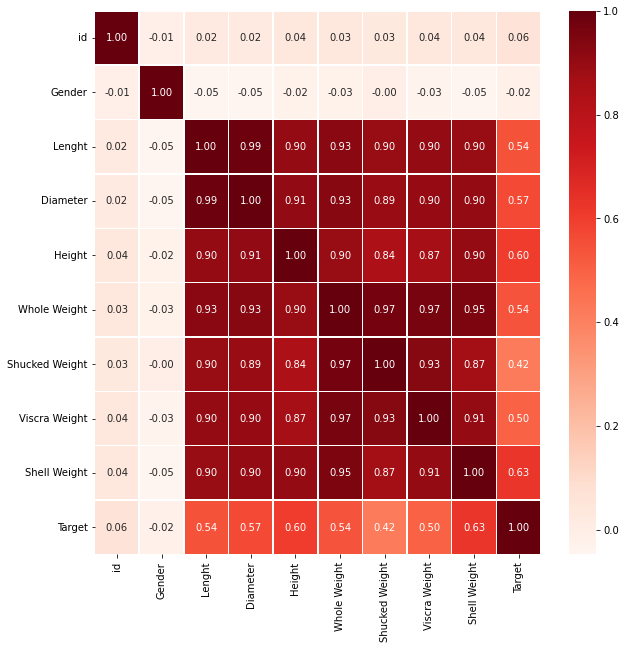

In [ ]:
# 전체 특성별 상관관계를 확인하기 위해 문자형 데이터를 정수형 데이터로 
le_encoder = LabelEncoder()

# 'Gender'열의 데이터를 정수형 데이터로 인코딩합니다.
train_data['Gender'] = le_encoder.fit_transform(train_data['Gender'])

# 히트맵을 사용하여 특성별 상관관계를 확인합니다.
plt.figure(figsize=(10,10))         # plt.figure(figsize=(12,12)): 12x12의 크기로 그림을 그려달라는 의미입니다.
sns.heatmap(data=train_data.corr(), # data=: 시각화에 사용할 자료를 선택합니다.
            annot=True,             # annot=: 셀 안에 숫자 표시 여부를 지정합니다.
            fmt='.2f',              # fmt=: annot=True인 경우 숫자의 표시 형식을 지정합니다.
            linewidths=.5,          # linewidths=: 각 셀을 나눌 선의 두께를 지정합니다. 
            cmap='Reds')            # cmap=: 표의 섹상을 지정합니다.

#### `4-2-1.` 필요 없는 열 제거

In [ ]:
# 위에서 상관관계를 확인하고 targer 데이터의 영향이 미미한 특성을 제거하겠습니다.
train_data.drop(columns='id', inplace=True) # 'id' 컬럼을 제거하고 원본 데이터에 적용합니다.
test_data.drop(columns='id', inplace=True)  # 'id' 컬럼을 제거하고 원본 데이터에 적용합니다.

train_data.drop(columns='Gender', inplace=True) # 'id' 컬럼을 제거하고 원본 데이터에 적용합니다.
test_data.drop(columns='Gender', inplace=True)  # 'id' 컬럼을 제거하고 원본 데이터에 적용합니다.

# 제거한 뒤 데이터를 확인하겠습니다.
display(train_data.head())
display(test_data.head())

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


### `4-3.` 데이터 분석 기법 EDA(탐색적 자료 분석) - ③ 통계량 확인

In [ ]:
display(train_data.describe())
display(test_data.describe())

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
count,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,0.524473,0.408275,0.139504,0.827689,0.359603,0.180417,0.238297
std,0.120051,0.099026,0.042975,0.486079,0.220856,0.108623,0.137754
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.455000,0.350000,0.115000,0.443375,0.188000,0.093500,0.130000
50%,0.545000,0.425000,0.145000,0.805250,0.340500,0.171500,0.235000
75%,0.615000,0.480000,0.165000,1.151125,0.501625,0.250500,0.325000
max,0.815000,0.650000,1.130000,2.825500,1.351000,0.641500,0.897000


### `4-4.` 데이터 분석 기법 EDA(탐색적 자료 분석) - ④ 이상치 확인

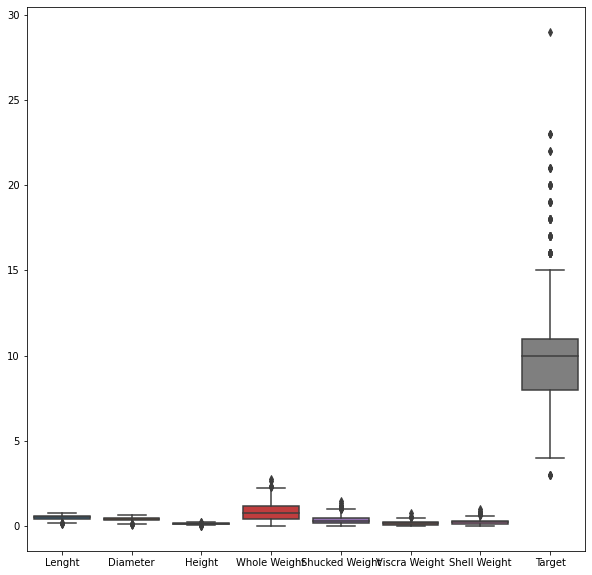

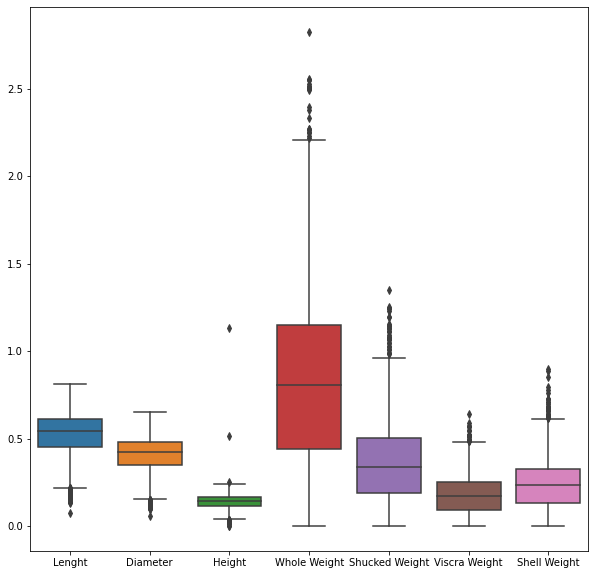

In [ ]:
# 학습과 테스트 데이터의 이상치를 시각화하여 확인합니다.
plt.figure(figsize=(10, 10))
sns.boxplot(data=train_data)
plt.figure(figsize=(10, 10))
sns.boxplot(data=test_data)
plt.show()

### `5.` 데이터 전처리 - ① 이상치
1. 최소값과 최대값으로 변환
2. 제거

#### `5-1.` 이상치를 사분위수 최솟값과 최댓값으로 치환하는 함수 생성

In [ ]:
# 각각의 이상치 처리 방법을 수행하기 위해 데이터를 복사하겠습니다.
train_data1 = train_data.copy() # 사분위수 최솟값과 최댓값으로 변환
train_data2 = train_data.copy() # 이상치 제거

# 이상치를 사분위수 최솟값과 최댓값으로 변환하는 함수를 생성합니다.
# 사분위수 최솟값 공식: Q1 - (1.5 * IQR)┃사분위수 최댓값 공식: Q3 + (1.5 * IQR)┃IQR 공식: Q3 - Q1
def quartile_min_max(df, column) :

  # np.percentile: 지정한 데이터의 원하는 사분위수를 반환합니다. (Q1: 25┃Q2: 50┃Q3: 75)
  IQR = (np.percentile(df[column].values, 75) - np.percentile(df[column].values, 25))

  # 사분위수 최솟값과 최댓값을 구합니다.
  quartile_min = (np.percentile(df[column].values, 25) - (1.5 * IQR)) # 사분위수 최솟값 공식: Q1 - (1.5 * IQR)
  quartile_max = (np.percentile(df[column].values, 75) + (1.5 * IQR)) # 사분위수 최댓값 공식: Q3 + (1.5 * IQR)

  # 최솟값보다 작고 최댓값보다 큰 값의 행 인덱스를 추출합니다.
  outlier_min_idx = df[column][df[column] < quartile_min].index # 최솟값보다 작은 값의 행 인덱스 번호를 outlier_min_idx 변수에 반환합니다.
  outlier_max_idx = df[column][df[column] > quartile_max].index # 최댓값보다 큰 값의 행 인덱스 번호를 outlier_max_idx 변수에 반환합니다.

  # outlier_idx 변수를 사용하여 해당하는 행의 값을 각각 최솟값과 최댓값으로 치환합니다.
  df.loc[outlier_min_idx, column] = quartile_min # 지정한 컬럼의 위에서 구한 행 인덱스 번호의 값을 최솟값으로 치환합니다.
  df.loc[outlier_max_idx, column] = quartile_max # 지정한 컬럼의 위에서 구한 행 인덱스 번호의 값을 최댓값으로 치환합니다.
  
  return df

In [ ]:
# quartile_min_max 함수를 사용하여 이상치를 사분위수 최솟값과 최댓값으로 치환하겠습니다.
# target 데이터와 상관관계가 높은 열을 우선적으로 수행하고 target 데이터는 치환하지 않겠습니다.
columns = ['Shell Weight', 'Height', 'Diameter', 'Whole Weight', 'Lenght', 'Viscra Weight', 'Shucked Weight']

# for column in columns :
#   train_data1 = quartile_min_max(train_data1, column)

for column in columns :
  test_data = quartile_min_max(test_data, column)

#### `5-2.` 이상치를 제거하는 함수 생성 ※ 치환 성능이 우수함으로 사용 중단 ※

In [ ]:
# def outlier_del(df, column) :
    
#     # IQR 값을 구합니다.
#     IQR = (np.percentile(df[column].values, 75) - np.percentile(df[column].values, 25))

#     # 사분위수 최솟값과 최댓값을 구합니다.
#     quartile_min = (np.percentile(df[column].values, 25) - (1.5 * IQR)) # 사분위수 최솟값 공식: Q1 - (1.5 * IQR)
#     quartile_max = (np.percentile(df[column].values, 75) + (1.5 * IQR)) # 사분위수 최댓값 공식: Q3 + (1.5 * IQR)

#     # 사분위수 최솟값과 최댓값을 벗어나는 모든 행의 인덱스 번호를 outlier_idx 변수에 반환합니다.
#     outlier_idx = df[column][(df[column] < quartile_min) | (df[column] > quartile_max)].index

#     # 위에서 구한 인덱스 번호를 사용하여 해당하는 행을 제거합니다.
#     df.drop(outlier_idx, axis=0, inplace=True)

#     return df

In [ ]:
# # outlier_del 함수를 사용하여 이상치를 제거하겠습니다.
# # target 데이터와 상관관계가 높은 열을 우선적으로 수행하고 target 데이터는 제거하지 않겠습니다.
# columns = ['Shell Weight', 'Height', 'Diameter', 'Whole Weight', 'Lenght', 'Viscra Weight', 'Shucked Weight']

# for column in columns :
#   train_data2 = outlier_del(train_data2, column)

### `6.` 데이터 전처리 - ② 분리

#### `6-1.` 분리 전 데이터 '왜도' 확인

In [ ]:
# 데이터 분리에 앞서 데이터들의 '왜도'를 확인합니다. '왜도' 값이 갖는 성질은 밑과 같습니다.
# 왼쪽으로 치우침: 0 > skew┃오른쪽으로 치우침: 0 < skew┃정규분포를 따른다: 0 == skew
# 즉 '왜도' 값이 0에 가까울 수록 정규분포를 따르는 좋은 데이터라고 할 수 있습니다.
print('----------train_data1.skew----------\n{}'.format(train_data1.skew()))
print('----------train_data2.skew----------\n{}'.format(train_data2.skew()))

----------train_data1.skew----------
Lenght           -0.560427
Diameter         -0.521224
Height           -0.108561
Whole Weight      0.581087
Shucked Weight    0.796945
Viscra Weight     0.683389
Shell Weight      0.699884
Target            1.152246
dtype: float64
----------train_data2.skew----------
Lenght           -0.560427
Diameter         -0.521224
Height           -0.108561
Whole Weight      0.581087
Shucked Weight    0.796945
Viscra Weight     0.683389
Shell Weight      0.699884
Target            1.152246
dtype: float64


#### `6-2.` feature 데이터와 target 분리

In [ ]:
# 전체 데이터에서 feature 데이터와 target 데이터를 분리합니다.
feature_train1 = train_data1.copy().drop(['Target'], axis=1) # target 데이터를 제외한 나머지 데이터를 복사합니다.
feature_train2 = train_data2.copy().drop(['Target'], axis=1) # target 데이터를 제외한 나머지 데이터를 복사합니다.
feature_test = test_data.copy() # 전체 데이터를 복사합니다.

# 원본 데이터에서 target 데이터인 'Target' 열을 target 변수에 넘겨줍니다.
# 데이터의 '왜도'를 확인했을 때 'Target'열이 유독 높게 나온 걸 확인할 수 있습니다. 이에 'Target' 데이터의 정규성을 높이고 분석에서 정확한 값을 얻기 위해 log 변환 취하도록 하겠습니다.
# 데이터에 0이 있을 경우 log 변환 시 값이 무한대가 나오기 때문에 (x + 1)을 수행하여 0 → 1로 만들어주는 로그 변환 함수 np.log1p를 사용하겠습니다.
target1 = np.log1p(train_data1['Target'].copy())
target2 = np.log1p(train_data2['Target'].copy())

### `7-1.` 모델 구축 및 함수를 사용한 학습 - ① light GBM

In [ ]:
# 예측하고자 하는 '나이'는 연속된 값으로 분류와 회귀 중 회귀에 해당합니다. 사용할 알고리즘은 트리 기반의 학습 알고리즘인 gradient boosting 방식의 LightGBM입니다.
lgb_model = lgb.LGBMRegressor(num_leaves=10,      # 복잡성을 컨트롤하는 파라미터로, max_depth 보다 작게 설정해야 오버 피팅을 막을 수 있으며 다음과 같을 때 d = (2^max_depth) 보통 d의 60% 정도로 지정합니다.
                              max_depth=4,        # 트리의 깊이를 제한하는 파라미터입니다.
                              learning_rate=0.06, # GBM 모듈은 초기 추정 값에서 시작하여 각각의 Tree 결과로 추정 값을 업데이트하는데 이때 변화의 크기를 지정하는 파라미터입니다.
                              n_estimators=90,    # 결정 트리의 개수를 지정합니다.
                              random_state=23)    # 수행시마다 동일한 결과를 얻기 위해 seed 값을 주어 고정시키는 파라미터입니다.

lgb_score = [] # 교차 검증을 수행할 때마다 NMAE score를 저장할 리스트 변수입니다.

lgb_kfold = KFold(n_splits=5,      # 교차 검증을 몇 번 할 것인지 즉 데이터를 몇 개로 나눌 것인지를 정하는 파라미터입니다.
                  shuffle=True,    # 데이터를 섞을지 말지 여부를 정하는 파라미터입니다.
                  random_state=23) # 수행시마다 동일한 결과를 얻기 위해 seed 값을 주어 고정시키는 파라미터입니다.

# KFold 객체에 split() 함수를 호출하면 폴드별 학습과 테스트 데이터의 행 인덱스를 배열로 반환합니다.
for train_idx, valid_idx in lgb_kfold.split(feature_train1) :
  x_train, x_valid = feature_train1.iloc[train_idx], feature_train1.iloc[valid_idx]
  y_train, y_valid = target1.iloc[train_idx], target1.iloc[valid_idx]

  # 학습을 진행합니다.
  lgb_model.fit(x_train,                       # 학습할 feature data를 지정합니다.
                y_train,                       # 학습할 target data를 지정합니다.
                eval_set=[(x_valid, y_valid)], # validation data를 지정합니다.
                early_stopping_rounds=20,      # 성능의 향상이 이루어지지 않았을 경우 학습을 조기 종료하는 파라미터로 횟수를 지정하여 사용합니다.
                verbose=0)                     # 모델의 학습이 이루어지는 동안 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가를 정하는 파라미터입니다. (0: 출력 안함┃1: 자세히┃2: 함축적인 정보만)

  # 예측을 수행합니다.
  y_pred = lgb_model.predict(x_valid)

  # NMAE 평가산식 코드를 작성합니다.
  mae = np.mean(np.abs(y_valid - y_pred))
  score = mae / np.mean(np.abs(y_valid))

  # NMAE score를 측정하여 리스트 변수에 붙여넣습니다.
  lgb_score.append(score)
  
# 교차 검증이 이루어질때마다 측정한 NMAE score의 평균을 출력합니다.
print('NMAE: ', np.mean(lgb_score))

# 테스트 데이터에 대한 예측을 진행하고 제출 형식에 맞게 파일을 csv 파일로 저장합니다.
submission_data['Target'] = np.expm1([0 if x < 0 else x for x in model.predict(feature_test)])
submission_data.to_csv('/content/gdrivd/MyDrive/Dacon/abalone age prediction contest/all model pred/submission_all_model.csv', index=False)

NMAE:  0.05910523867344908


### `7-2.` 모델 구축 및 함수를 사용한 학습 - ② XGBoost Regression

In [ ]:
xgb_model = XGBRegressor(max_depth=3,
                         learning_rate=0.1,
                         n_estimators=60,
                         verbosity=0,
                         random_state=23)

xgb_score = [] # 교차 검증을 수행할 때마다 NMAE score를 저장할 리스트 변수입니다.

xgb_kfold = KFold(n_splits=5,      # 교차 검증을 몇 번 할 것인지 즉 데이터를 몇 개로 나눌 것인지를 정하는 파라미터입니다.
                  shuffle=True,    # 데이터를 섞을지 말지 여부를 정하는 파라미터입니다.
                  random_state=23) # 수행시마다 동일한 결과를 얻기 위해 seed 값을 주어 고정시키는 파라미터입니다.

# KFold 객체에 split() 함수를 호출하면 폴드별 학습과 테스트 데이터의 행 인덱스를 배열로 반환합니다.
for train_idx, valid_idx in xgb_kfold.split(feature_train1) :
  x_train, x_valid = feature_train1.iloc[train_idx], feature_train1.iloc[valid_idx]
  y_train, y_valid = target1.iloc[train_idx], target1.iloc[valid_idx]

  # 학습을 진행합니다.
  xgb_model.fit(x_train,                       # 학습할 feature data를 지정합니다.
                y_train,                       # 학습할 target data를 지정합니다.
                eval_set=[(x_valid, y_valid)], # validation data를 지정합니다.
                early_stopping_rounds=20,      # 성능의 향상이 이루어지지 않았을 경우 학습을 조기 종료하는 파라미터로 횟수를 지정하여 사용합니다.
                verbose=False)                 # 모델의 학습이 이루어지는 동안 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가를 정하는 파라미터입니다. (0: 출력 안함┃1: 자세히┃2: 함축적인 정보만)

  # 예측을 수행합니다.
  y_pred = xgb_model.predict(x_valid)

  # NMAE 평가산식 코드를 작성합니다.
  mae = np.mean(np.abs(y_valid - y_pred))
  score = mae / np.mean(np.abs(y_valid))

  # NMAE score를 측정하여 리스트 변수에 붙여넣습니다.
  xgb_score.append(score)
  
# 교차 검증이 이루어질때마다 측정한 NMAE score의 평균을 출력합니다.
print('NMAE: ', np.mean(xgb_score))

NMAE:  0.05910791070448947


### `7-3.` 모델 구축 및 함수를 사용한 학습 - ③ GradientBoostingRegressor

In [ ]:
gbr_model = GradientBoostingRegressor(loss='absolute_error',
                                      learning_rate=0.07,
                                      n_estimators=90,
                                      min_samples_split=3,
                                      min_samples_leaf=5,
                                      max_depth=5,
                                      random_state=23)

gbr_score = [] # 교차 검증을 수행할 때마다 NMAE score를 저장할 리스트 변수입니다.

gbr_kfold = KFold(n_splits=5,      # 교차 검증을 몇 번 할 것인지 즉 데이터를 몇 개로 나눌 것인지를 정하는 파라미터입니다.
                  shuffle=True,    # 데이터를 섞을지 말지 여부를 정하는 파라미터입니다.
                  random_state=23) # 수행시마다 동일한 결과를 얻기 위해 seed 값을 주어 고정시키는 파라미터입니다.

# KFold 객체에 split() 함수를 호출하면 폴드별 학습과 테스트 데이터의 행 인덱스를 배열로 반환합니다.
for train_idx, valid_idx in xgb_kfold.split(feature_train1) :
  x_train, x_valid = feature_train1.iloc[train_idx], feature_train1.iloc[valid_idx]
  y_train, y_valid = target1.iloc[train_idx], target1.iloc[valid_idx]

  # 학습을 진행합니다.
  gbr_model.fit(x_train, y_train)

  # 예측을 수행합니다.
  y_pred = gbr_model.predict(x_valid)

  # NMAE 평가산식 코드를 작성합니다.
  mae = np.mean(np.abs(y_valid - y_pred))
  score = mae / np.mean(np.abs(y_valid))

  # NMAE score를 측정하여 리스트 변수에 붙여넣습니다.
  gbr_score.append(score)
  
# 교차 검증이 이루어질때마다 측정한 NMAE score의 평균을 출력합니다.
print('NMAE: ', np.mean(gbr_score))

NMAE:  0.0607102370503253


### `8.` 앙상블 기법 - Soft_Voting

In [ ]:
# 여러개의 모델 예측 결과를 합하여 평균을 구하는 앙상블 기법입니다.
models = [lgb_model, xgb_model, gbr_model] # 학습이 완료된 모델을 리스트 변수에 넣어줍니다.

# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = None

# 학습 된 모델들을 순차적으로 불러옵니다.
for model in models :
  
  # 각 모델들의 최종 회귀값들을 prediction에 모두 더해줍니다.
  if prediction is None :
      prediction = np.expm1([0 if x < 0 else x for x in model.predict(feature_test)])
  else :
      prediction += np.expm1([0 if x < 0 else x for x in model.predict(feature_test)])
        
# 앙상블에 참여한 모든 모델의 수 만큼 다시 나눠줍니다 (= 평균)
prediction /= len(models)

# 제출 형식에 맞게 파일을 변환합니다.
submission_data['Target'] = prediction
submission_data.to_csv('/content/gdrivd/MyDrive/Dacon/abalone age prediction contest/all model pred/submission_all_model.csv', index=False)

### `8.` 제출 파일 생성

In [ ]:
models = [lgb_model, xgb_model, gbr_model]
file_name = ['submission_lgb_model.csv', 'submission_xgb_model.csv', 'submission_gbr_model.csv']

def PreparationAnswerSheet(model, file_name) :
  # 테스트 데이터에 대한 예측을 진행하고 제출 형식에 맞게 파일을 csv 파일로 저장합니다.
  submission_data['Target'] = np.expm1([0 if x < 0 else x for x in model.predict(feature_test)])
  submission_data.to_csv('/content/gdrivd/MyDrive/Dacon/abalone age prediction contest/all model pred/'+str(file_name), index=False)

PreparationAnswerSheet(gbr_model, file_name)

### 최적의 파라미터 찾기

In [ ]:
# 그리드 서치로 최적의 파라미터를 찾습니다.
params = {'learning_rate':[0.07], 'n_estimators':[90], 'min_samples_split':[3], 'min_samples_leaf':[5], 'max_depth':[5]}

gbr_model = GradientBoostingRegressor(loss='absolute_error')

#########################################
def FindTheBestParameters(model, params) :
    # estimator: 적용할 모델 등을 지정합니다.
    # param_grid: 튜닝을 위해 파라미터를 지정합니다. 리스트 형식으로 변수에 할당해서 사용합니다.
    # scoring: 예측 성능을 측정할 평가 방법을 지정합니다. 보통 accuracy 로 지정하여서 정확도로 성능 평가를 합니다. 
    # cv: 교차 검증에서 몇개로 분할되는지 지정합니다.
    gr_se = GridSearchCV(estimator=model, 
                         param_grid = params,
                         scoring = 'neg_mean_absolute_error',
                         cv=5)

    # 학습합니다.
    gr_se.fit(feature_train1, target1)

    # 최적의 파라미터를 출력합니다.
    print(gr_se.best_params_)
    # 가장 성능 좋은 estimator(모델)
    print(gr_se.best_estimator_)  #가장 최적의 하이퍼파라미터 설정을 보여준다
############################################


FindTheBestParameters(gbr_model, params)

### model history
1. light GBM  
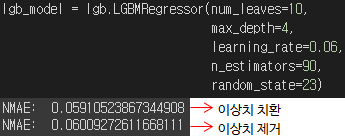
2. XGBoost Regression  
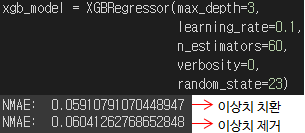
3. GradientBoostingRegressor  
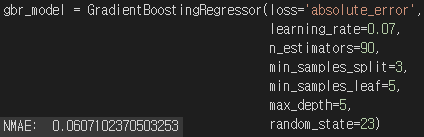

## 참고 사이트
1. https://yssa.tistory.com/entry/Big-Data-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC
2. https://dacon.io/competitions/official/235877/codeshare/4712?page=1&dtype=recent

베이시안 알고리즘(서치)